**Created by:** Revekka Gershovich
**When:** Nov 25, 2024
**Purpose:** 
**Question from Nicolas:** "Also a quick question regarding the political composition. By looking at the data I noticed that the presidency/governor and chamber compositions seem to have the wrong years (e.g., in 2008 the Dems hold both chambers and the Presidency but it is coded as 2010). I assume it's coming from a rounding but I wanted to make sure. Could you double check?"
**Answer:**  It turned out that by state we coded by year of election, and I coded for middle year. 
**Question from Nicolas:** 
When you have the time, could you look at which legislatures/governors we are missing using the biennium approach as we talked about? 



In [107]:
import os
import os.path as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
parent_dir = os.path.abspath("/Users/revekkagershovich/Dropbox (MIT)/StateLaws")
os.chdir(parent_dir)
assert os.path.exists(parent_dir), "parent_dir does not exist"
intermed_data_dir = "./2_data/2_intermediate/political_data"
assert os.path.exists(intermed_data_dir), "Data directory does not exist"
raw_data_dir = "./2_data/1_raw/political_data/all_partisanComposition"
assert os.path.exists(raw_data_dir), "Data directory does not exist"

In [67]:
df = pd.read_csv(path.join(intermed_data_dir, "political_composition.csv"))
state_df = pd.read_stata(path.join(intermed_data_dir, "political_composition_no_fed.dta"))
fed_df = pd.read_csv(path.join(intermed_data_dir, "federal_political_composition.csv"))

In [53]:
fed_df.tail(2)

,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_lowhse,rep_lowhse,dem_upphse,rep_upphse,president_party
94,2022,0.487850,0.504673,0.489655,0.508046,0.48,0.49,1.0
95,2024,0.480374,0.506542,0.487356,0.501149,0.45,0.53,2.0


In [43]:
state_df.tail(2)

,state_abbrev,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_upphse,dem_lowhse,rep_upphse,rep_lowhse,gov_party
3902,WY,2018.0,0.125000,0.875000,0.100000,0.150000,0.900000,0.850000,2.0
3903,MS,2020.0,0.379414,0.620586,0.365385,0.393443,0.634615,0.606557,2.0


In [113]:
# state_df[['dem_upphse', 'dem_lowhse', 'gov_party']].isnull().sum()
print(state_df[['gov_party']].isnull().sum())
missing_rows = state_df[state_df[['gov_party']].isnull().any(axis=1)]

gov_party    453
dtype: int64


In [109]:
print(state_df['yr_rd2'].nunique())
print(missing_rows['yr_rd2'].nunique())
print(set(state_df['yr_rd2'].unique()) - set(missing_rows['yr_rd2'].unique()))
# print(missing_rows['yr_rd2'].value_counts())

94
86
{1956.0, 2020.0, 1958.0, 1960.0, 1964.0, 1936.0, 1972.0, 2006.0}


In [115]:
nj_df = state_df[state_df['state_abbrev'] == 'NJ']
ms_df = state_df[state_df['state_abbrev'] == 'MS']
la_df = state_df[state_df['state_abbrev'] == 'LA']
va_df = state_df[state_df['state_abbrev'] == 'VA']
print(f"New Jersey has observations for {nj_df['yr_rd2'].nunique()} years")
print(f"Mississippi has observations for {ms_df['yr_rd2'].nunique()} years")
print(f"Louisiana has observations for {la_df['yr_rd2'].nunique()} years")
print(f"Virginia has observations for {va_df['yr_rd2'].nunique()} years")


New Jersey has observations for 89 years
Mississippi has observations for 91 years
Louisiana has observations for 89 years
Virginia has observations for 92 years


In [118]:
print(set(state_df['yr_rd2'].unique()) - set(ms_df['yr_rd2'].unique()))

{1954.0, 1860.0, 1862.0}


In [117]:
ms_df.head(20)

,state_abbrev,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_upphse,dem_lowhse,rep_upphse,rep_lowhse,gov_party
12,MS,1834.0,0.980769,0.019231,1.000000,0.961538,0.000000,0.038462,1.0
37,MS,1836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,MS,1838.0,0.577778,0.422222,0.566667,0.588889,0.433333,0.411111,NaN
87,MS,1840.0,0.578022,0.421978,0.620690,0.535354,0.379310,0.464646,1.0
111,MS,1842.0,0.637729,0.362271,0.677419,0.598039,0.322581,0.401961,1.0
136,MS,1844.0,0.631649,0.368351,0.625000,0.638298,0.375000,0.361702,1.0
164,MS,1846.0,0.699248,0.300752,0.714286,0.684211,0.285714,0.315789,1.0
193,MS,1848.0,0.765625,0.234375,0.781250,0.750000,0.218750,0.250000,1.0
224,MS,1850.0,0.649660,0.350340,0.666667,0.632653,0.333333,0.367347,1.0
254,MS,1852.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


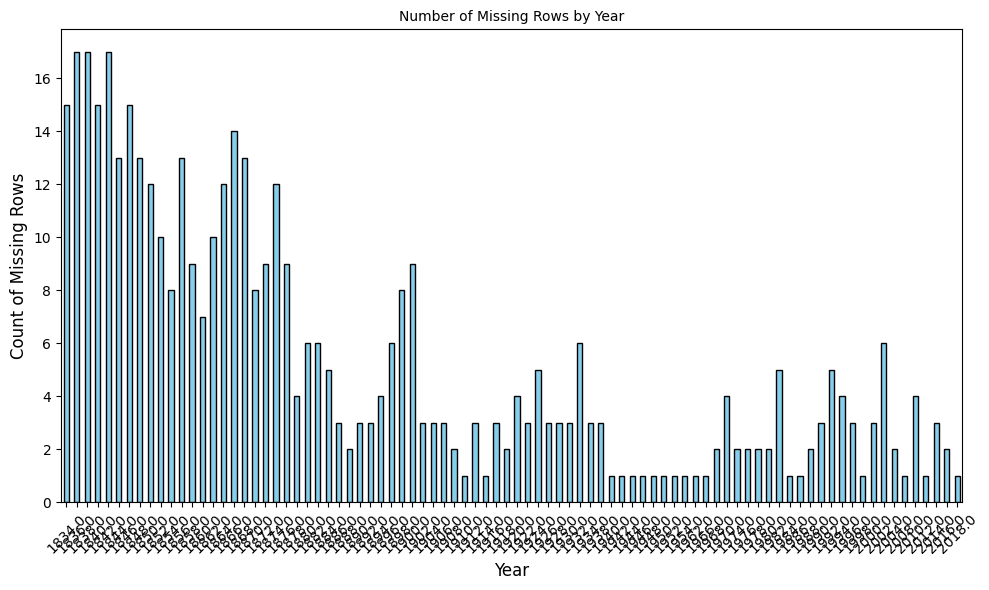

In [111]:
# Calculate value counts for 'yr_rd2'
value_counts = missing_rows['yr_rd2'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
value_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Missing Rows", fontsize=12)
plt.title("Number of Missing Rows by Year", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Two reasons data for gubernatorial elections is missing: 
1. elections in odd years
2. non-republicans and non-democrats are missing

In [57]:
# Debugging 3rd parties
missing_rows = missing_rows[missing_rows['yr_rd2'] < 1856]

In [58]:
missing_rows.head(3)

,state_abbrev,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_upphse,dem_lowhse,rep_upphse,rep_lowhse,gov_party
1,CT,1834.0,0.216597,0.783403,0.190476,0.242718,0.809524,0.757282,NaN
3,GA,1834.0,0.704487,0.295513,0.692308,0.716667,0.307692,0.283333,NaN
5,IN,1834.0,0.564972,0.435028,0.559322,0.570621,0.440678,0.429379,NaN


I used the following querie for ChatGPT to generate whig_governors.csv: 
Create a list of Whig governors with their states and year of election. Here is the list: "Pages in category "Whig Party state governors of the United States"
The following 88 pages are in this category, out of 88 total. This list may not reflect recent changes.

A
Henry B. Anthony
Samuel Turell Armstrong
Lemuel H. Arnold
B
Roger Sherman Baldwin
Mordecai Bartley
William Bebb
Samuel Bigger
Clark Bissell
George N. Briggs
Neill S. Brown
Thomas Brown (Florida politician)
C
William B. Campbell
Newton Cannon
James Clark (Kentucky politician)
Myron H. Clark
John H. Clifford
Anthony Colby
Cornelius P. Comegys
Carlos Coolidge
William B. Cooper (Delaware politician)
Thomas Corwin
George W. Crawford
John J. Crittenden
William G. Crosby
D
John Davis (Massachusetts governor)
Edward Bishop Dudley
Joseph Duncan (politician)
Henry Dutton (politician)
E
Horace Eaton
William W. Ellsworth
Edward Everett
F
Erastus Fairbanks
Leonard J. Farwell
Hamilton Fish
Samuel A. Foot
Seabury Ford
G
George R. Gilmer
Thomas Walker Gilmer
James Wright Gordon
William Alexander Graham
John Munford Gregory
James W. Grimes
H
Elisha Harris
John L. Helm
William W. Hoppin
Washington Hunt
J
Charles Jackson (Rhode Island politician)
Silas H. Jennison
William F. Johnston
James C. Jones
K
Edward Kent
L
Robert P. Letcher
Charles Lynch (politician)
M
Charles Manly
John Mattocks
Joseph Maull
James T. Morehead (Kentucky politician)
John Motley Morehead
N
Noah Noble
O
William Owsley
P
Charles Paine
John M. Patton
William Pennington
Charles Polk Jr.
James Pollock (American politician)
Thomas Pratt (Maryland politician)
Q
John A. Quitman
R
Wyndham Robertson
André B. Roman
Stephen Royce
S
Elias P. Seeley
William H. Seward
William Slade (politician)
William Sprague III
Thomas Stockton
Charles C. Stratton
David L. Swain
T
William Temple (politician)
V
Joseph Vance (Ohio politician)
Thomas Veazey
Richard H. Vose
W
David Wallace (Indiana politician)
Emory Washburn
Edward D. White Sr.
Charles A. Wickliffe
Charles K. Williams
William Woodbridge
Y
John Young (governor)" Be sure to include a governor more than once if they were elected more than once. For states use state abbreviations (e.g. CA for California). Can variable containing state 'state_abbrev', containing year 'yr_rd2', name of governor 'gov_name' and gov_party  which should have value '2.0' for all obsevations. Generate a csv. 

I just passed a list from Wikipedia from here: https://en.wikipedia.org/wiki/Category:Whig_Party_state_governors_of_the_United_States

In [90]:
whig_governors = pd.read_csv(path.join(raw_data_dir, "whig_governors.csv"))

In [91]:
print(whig_governors.shape[0])
print(whig_governors['gov_name'].nunique()) 
assert whig_governors['gov_name'].nunique() == 88, "database contradicts wikipedia page"

90
88


In [92]:
whig_governors = whig_governors[whig_governors['yr_rd2'] > 1833]
print(whig_governors.shape[0])

83


In [93]:
missing_rows.head(2)

,state_abbrev,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_upphse,dem_lowhse,rep_upphse,rep_lowhse,gov_party
1,CT,1834.0,0.216597,0.783403,0.190476,0.242718,0.809524,0.757282,NaN
3,GA,1834.0,0.704487,0.295513,0.692308,0.716667,0.307692,0.283333,NaN


In [94]:
# Not the final merge - it's a quick and dirty merge to understand what merges and what does not
miss_whig_govs = pd.merge(missing_rows, whig_governors, on=['yr_rd2', 'state_abbrev'], how='outer')

In [95]:
print(miss_whig_govs[miss_whig_govs['gov_name'].notnull()].shape)

(83, 11)


In [97]:
not_merged = miss_whig_govs[miss_whig_govs['shr_dem_in_sess'].isnull()]
print(not_merged.shape[0])

41


In [98]:
not_merged.head(2)

,state_abbrev,yr_rd2,shr_dem_in_sess,shr_rep_in_sess,dem_upphse,dem_lowhse,rep_upphse,rep_lowhse,gov_party_x,gov_name,gov_party_y
2,IL,1834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Duncan,2.0
16,LA,1835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward D. White Sr.,2.0


In [80]:
print(state_df.loc[state_df['state_abbrev'] == 'GA'])

     state_abbrev  yr_rd2  shr_dem_in_sess  shr_rep_in_sess  dem_upphse  \
3              GA  1834.0         0.704487         0.295513    0.692308   
28             GA  1836.0         0.584756         0.415244    0.589406   
53             GA  1838.0         0.513020         0.486980    0.497892   
78             GA  1840.0         0.468795         0.531205    0.475394   
102            GA  1842.0         0.579687         0.420313    0.593874   
...           ...     ...              ...              ...         ...   
3710           GA  2010.0         0.401187         0.598813    0.387338   
3759           GA  2012.0         0.359233         0.640767    0.357143   
3806           GA  2014.0         0.328312         0.671688    0.321429   
3849           GA  2016.0         0.323848         0.676152    0.312500   
3883           GA  2018.0         0.342720         0.657280    0.333442   

      dem_lowhse  rep_upphse  rep_lowhse  gov_party  
3       0.716667    0.307692    0.283333     